In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

In [354]:
EMI_PATH = r"Z:\TekBox_EMI_Calibration\TEKBOX 1.29.26 TESTS\OTHER LISN\LINE\10M-comb_LINE.csv"
NEW_PATH = r'C:\Users\enfxm\Desktop\Python\TekBox EMI Calibration\EMI_CSV_FILES\10M-ATTEN166-LINE'

In [355]:
with open(EMI_PATH, 'r', encoding='utf-8') as f:
    content = f.read()
    # print(content)

In [356]:
content = content.replace(' ', '')
content = content.replace(',', '.')
content = content.replace(';', ',')
content = "Frequency (Hz),Amplitude (dBm)\n" + content
print(content)



with open(NEW_PATH, 'w') as file:
    file.write(content)


Frequency (Hz),Amplitude (dBm)
10000000,-55.13
10009000,-75
10018000,-88.32
10027000,-92.98
10036000,-92.89
10045000,-93.93
10054000,-93.26
10063000,-93.73
10072000,-93.07
10081000,-94.55
10090000,-92.98
10099000,-94.13
10108000,-94.13
10117000,-93.93
10126000,-94.99
10135000,-92.63
10144000,-93.73
10153000,-93.73
10162000,-93.44
10171000,-93.54
10180000,-95.22
10189000,-94.88
10198000,-93.93
10207000,-93.93
10216000,-93.26
10225000,-94.34
10234000,-94.66
10243000,-93.73
10252000,-94.77
10261000,-92.12
10270000,-94.77
10279000,-93.93
10288000,-94.03
10297000,-93.07
10306000,-93.93
10315000,-94.66
10324000,-92.29
10333000,-93.83
10342000,-91.96
10351000,-94.13
10360000,-94.34
10369000,-94.13
10378000,-94.99
10387000,-94.13
10396000,-92.98
10405000,-93.73
10414000,-92.45
10423000,-90.91
10432000,-94.88
10441000,-93.54
10450000,-93.83
10459000,-94.77
10468000,-92.98
10477000,-94.99
10486000,-94.13
10495000,-94.23
10504000,-92.71
10513000,-93.34
10522000,-92.98
10531000,-94.34
10540000,-92

In [344]:
df = pd.read_csv(NEW_PATH)

df.columns

Index(['Frequency (Hz)', 'Amplitude (dBm)'], dtype='object')

<Axes: xlabel='Frequency (Hz)'>

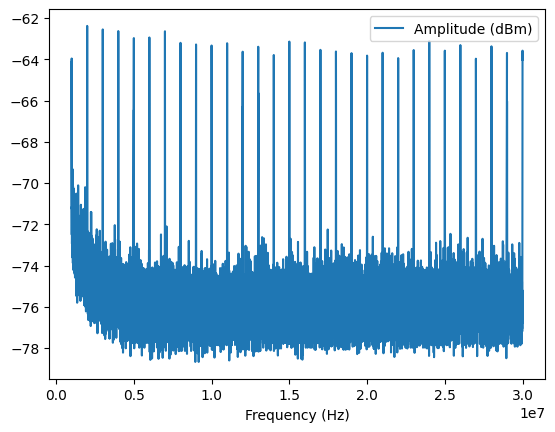

In [319]:
df.plot(x='Frequency (Hz)', y='Amplitude (dBm)')


In [320]:
EMCO_df = pd.read_csv(r"C:\Users\enfxm\Desktop\Python\TekBox EMI Calibration\EMI_CSV_FILES\1M-EMCO3810-LINE")
ATTEN_df = pd.read_csv(r"C:\Users\enfxm\Desktop\Python\TekBox EMI Calibration\EMI_CSV_FILES\1M-ATTEN166-LINE")

In [321]:
# ATTEN_df[' Amplitude (dBm)'] = ATTEN_df[' Amplitude (dBm)'] - 10

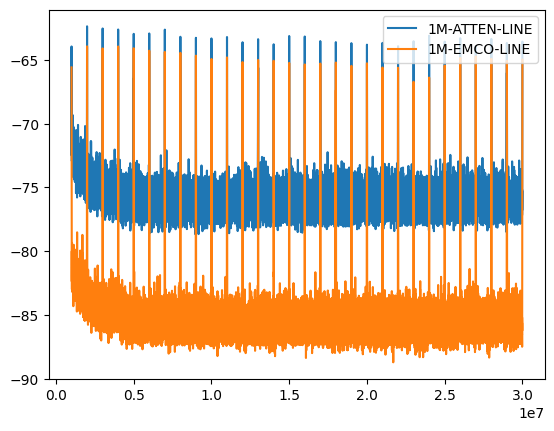

In [322]:


fig, ax = plt.subplots()



ax.plot(ATTEN_df['Frequency (Hz)'], ATTEN_df['Amplitude (dBm)'], label='1M-ATTEN-LINE')
ax.plot(EMCO_df['Frequency (Hz)'], EMCO_df['Amplitude (dBm)'], label='1M-EMCO-LINE')


ax.legend()
plt.show()

In [323]:
peaks_enco,_ = find_peaks(EMCO_df['Amplitude (dBm)'], height=-69)
peaks_atten,_ = find_peaks(ATTEN_df['Amplitude (dBm)'], height=-69)

EMCO_PEAKS_df = EMCO_df.iloc[peaks_enco]
ATTEN_PEAKS_df = ATTEN_df.iloc[peaks_atten]

# EMCO_PEAKS_df.plot(x='Frequency (Hz)', y='Amplitude (dBm)', marker='o')
# ATTEN_PEAKS_df.plot(x='Frequency (Hz)', y='Amplitude (dBm)', marker='o')

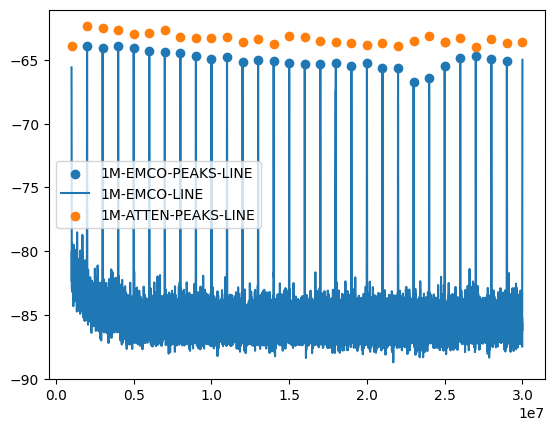

In [324]:
fig, ax = plt.subplots()



# ax.plot(ATTEN_df['Frequency(Hz)'], ATTEN_df[' Amplitude (dBm)'], label='1M-ATTEN-LINE')

ax.scatter(EMCO_PEAKS_df['Frequency (Hz)'], EMCO_PEAKS_df['Amplitude (dBm)'], label='1M-EMCO-PEAKS-LINE', marker='o')
ax.plot(EMCO_df['Frequency (Hz)'], EMCO_df['Amplitude (dBm)'], label='1M-EMCO-LINE')

ax.scatter(ATTEN_PEAKS_df['Frequency (Hz)'], ATTEN_PEAKS_df['Amplitude (dBm)'], label='1M-ATTEN-PEAKS-LINE', marker='o')

ax.legend()
plt.show()

In [325]:
ATTEN_avg = np.average(ATTEN_PEAKS_df['Amplitude (dBm)'])
EMCO_avg = np.average(EMCO_PEAKS_df['Amplitude (dBm)'])

delta = ATTEN_avg - EMCO_avg

print(delta)

1.6479147465437833
